In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [7]:
df = pd.read_csv('Mall_Customers.csv')

df = df.rename(columns={
    'Gender': 'gender',
    'Age': 'age',
    'Annual Income (k$)': 'income',
    'Spending Score (1-100)': 'spending_score'
})
df['gender'].replace(['Female', 'Male'], [0,1], inplace=True)

df.head()

,CustomerID,gender,age,income,spending_score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


Cari nilai K dengan metode Elbow

Text(0, 0.5, 'Inertia')

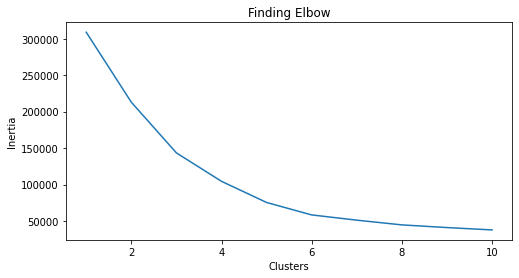

In [14]:
x = df.drop(['CustomerID', 'gender'], axis=1)

from sklearn.cluster import KMeans

clusters = []
# K is 1-11
for i in range(1,11):
    model = KMeans(i)
    model.fit(x)
    clusters.append(model.inertia_)

# buat plot inersia
fig, ax = plt.subplots(figsize=(8, 4))
sb.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Finding Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

Build K-Means

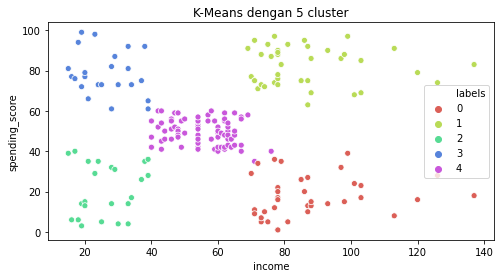

In [18]:
model = KMeans(5)
model.fit(x)

x['labels'] = model.labels_

plt.figure(figsize=(8,4))
sb.scatterplot(x['income'], x['spending_score'], hue=x['labels'],
               palette=sb.color_palette('hls',5))
plt.title('K-Means dengan 5 cluster')
plt.show()